In [1]:
from scipy.io.idl import readsav
from netCDF4 import Dataset, num2date
from mpl_toolkits.basemap import Basemap
from astropy.io import fits
import numpy as np
import healpy as hp
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os

In [2]:
filename_Q = '/Users/Kiana/Desktop/projects/uwsummer/1131454296_uniform_Residual_Q_HEALPix.fits'
filename_U = '/Users/Kiana/Desktop/projects/uwsummer/1131454296_uniform_Residual_I_HEALPix.fits'
#warnings.filterwarnings("ignore", category=DeprecationWarning)
#m = Basemap(projection='moll', lon_0=90, resolution='c')
# draw parallels and meridians. Degrees&direction intrinsic to basemap
#m.drawparallels(np.arange(-90., 120., 30.));
#m.drawmeridians(np.arange(0., 420., 60.));

In [3]:
contents_Q = fits.open(filename_Q)
pixelnum_Q = contents_Q[1].header['naxis1'] * contents_Q[1].header['naxis2']
data_Q = contents_Q[1].data
nside_Q = contents_Q[1].header['nside']

contents_U = fits.open(filename_U)
pixelnum_U = contents_U[1].header['naxis1'] * contents_U[1].header['naxis2']
data_U = contents_U[1].data
nside_U = contents_U[1].header['nside']

print type(data_Q)
print type(data_U)
print data_Q.columns

<class 'astropy.io.fits.fitsrec.FITS_rec'>
<class 'astropy.io.fits.fitsrec.FITS_rec'>
ColDefs(
    name = 'PIXEL'; format = '1J'
    name = 'SIGNAL'; format = '1E'
    name = 'N_OBS'; format = '1J'
    name = 'SERROR'; format = '1E'
)


In [4]:
# print pixels_Q.columns
pixels_Q = data_Q.field('PIXEL')
signal_Q = data_Q.field('SIGNAL')
print type(pixels_Q)
pixels_U = data_U.field('PIXEL')
signal_U = data_U.field('SIGNAL')
print type(pixels_U)

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


In [5]:
ra_Q, dec_Q = hp.pixelfunc.pix2ang(int(nside_Q), pixels_Q, nest=False, lonlat=True)
ra_Q[np.where(ra_Q > 180)] -= 360
ra_U, dec_U = hp.pixelfunc.pix2ang(int(nside_U), pixels_Q, nest=False, lonlat=True)
ra_U[np.where(ra_U > 180)] -= 360


In [6]:
# Finding x and y from Stokes parameters U and Q
Q = signal_Q
U = signal_U
#print U
K = np.sqrt(U**2 + Q**2)
U_pos = U[np.where(U >= 0)]
U_neg = U[np.where(U < 0)]

#theta is in radians
theta = (.5*np.arccos(((K + Q)/K) - 1))
theta[np.where(U >= 0)] = theta
theta[np.where(U < 0)] = theta + np.pi/2
print theta
theta.shape

x = K * np.cos(theta)
y = K * np.sin(theta)
print x
print y

[ 0.70445102  0.21135898  2.27524734 ...,  0.96283299  1.45022237
  1.13905752]
[ 0.02797391  0.00376939 -0.03366731 ...,  0.01308751  0.00294245
  0.00946569]
[ 0.02377575  0.00080877  0.03961205 ...,  0.01880682  0.02428534
  0.0205451 ]


/Users/Kiana/anaconda/envs/python27/lib/python2.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: assignment will raise an error in the future, most likely because your index result shape does not match the value array shape. You can use `arr.flat[index] = values` to keep the old behaviour.
  # This is added back by InteractiveShellApp.init_path()
/Users/Kiana/anaconda/envs/python27/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: assignment will raise an error in the future, most likely because your index result shape does not match the value array shape. You can use `arr.flat[index] = values` to keep the old behaviour.
  if sys.path[0] == '':


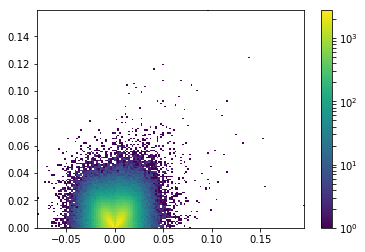

In [7]:
plt.hist2d(x, y, bins=150, norm=LogNorm())
plt.colorbar()
plt.show()